<a href="https://colab.research.google.com/github/dvw4/EMG/blob/EMG/_Jax_gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Information**

Link for medium: https://medium.com/@drgsh2010/gradient-boosting-b1f5f95bfa4e
One of the most well-liked and efficient machine learning techniques is gradient boosting. It is effective to combine a number of weak models or learners into a strong model. A weak model is one that performs poorly in terms of accuracy. A model is considered weak if it has trouble outperforming completely random predictions. Therefore, the purpose of utilizing gradient boosting is to take a number of weak models with poor accuracy performance and merge them into a single strong model with good accuracy, which is obviously what we want!



The Gradient Boosting Algorithm has four steps, which are listed below.



Algorithm for Gradient Boosting 

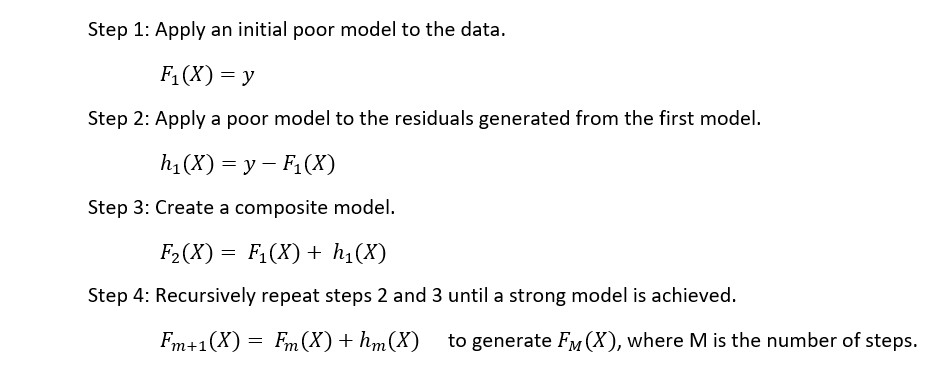

When M is sizable enough, the outcome is a robust composite model that can be applied to forecasting.

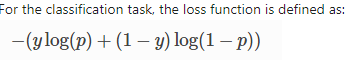
The loss function is specified as follows for the classification task:


The loss function is defined as follows in the context of multiclass classification, which will be used later:
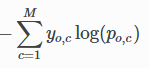

Gradient Boosting's secret is to fit a new model to the residual errors that the old model left behind. Gradient Boosting uses calculating the gradient for each step, as implied by the name. In order to make sure we are actually moving in the right direction, this is utilized to update the weights.


The fine tuning of the two hyperparameters, learning rate and n estimators, is a crucial part of gradient boosting. How much each weak learner actually contributes is weighted using the first hyperparameter, learning rate. To quantify the number of models in the ensemble, use the second parameter, n estimators. For the model to be very accurate and to avoid overfitting, these two hyperparameters must be tweaked.

Scikit-learn will be used in this notebook to implement Gradient Boosting. The performance of the implementation will next be evaluated using an electromyography dataset.

## Importing Libreries##

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os


Mounted at /content/drive


In [5]:
%cd drive/MyDrive/hw31

/content/drive/MyDrive/hw31


Extracting rar Files

In [ ]:
!pip install unrar
!unrar x "EMG .rar"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from EMG .rar

Creating    EMG Physical Action Data Set                              OK
Extracting  EMG Physical Action Data Set/readme.txt                        0%  OK 
Creating    EMG Physical Action Data Set/sub1                         OK
Creating    EMG Physical Action Data Set/sub1/Aggressive              OK
Creating    EMG Physical Action Data Set/sub1/Aggressive/log          OK
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/Elbowing.log       0%  OK 
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/FrontKicking.log       0%  1%  OK 
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/Hamering.log       1%  OK 
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/Headering.log       1%  2%  OK 
Extracting  E

This code defines an empty dictionary for action names and corresponding labels.
Then, it reads in all the files in the directory
and extracts the 8 column names from the filenames.
Next, it chunks the data using the max of every 10 sequential values.
Finally, it defines the class labels and concatenates the data.

In [6]:
import os
import matplotlib.pyplot as plt
import sklearn 

actions = {} #defining an empty dictionary for action names and corresponding labels

data_dirs = ["/content/drive/MyDrive/hw31/EMG Physical Action Data Set/sub1/Aggressive/txt/",
             "/content/drive/MyDrive/hw31/EMG Physical Action Data Set/sub1/Normal/txt",
             "/content/drive/MyDrive/hw31/EMG Physical Action Data Set/sub2/Aggressive/txt/",
             "/content/drive/MyDrive/hw31/EMG Physical Action Data Set/sub2/Normal/txt",
             "/content/drive/MyDrive/hw31/EMG Physical Action Data Set/sub3/Aggressive/txt/",
             "/content/drive/MyDrive/hw31/EMG Physical Action Data Set/sub3/Normal/txt",
             "/content/drive/MyDrive/hw31/EMG Physical Action Data Set/sub4/Aggressive/txt/",
             "/content/drive/MyDrive/hw31/EMG Physical Action Data Set/sub4/Normal/txt"]
             
ind = 0
data = pd.DataFrame()

for dirs in data_dirs :
  for files in os.listdir(dirs):

    with open(os.path.join(dirs, files), "r") as f:  # from all the files within all the dirs, read the tab separated files.
    
     # Extracting the 8 columns names from filenames
      temp = pd.read_csv(f.name,
                        sep = "\t",
                        header = None, 
                          names = ["ch" + str(i) for i in range(1, 9)] # 8 input channels
                        )
      
      # chunking using Max of every 10 sequential values.
      temp_chunked = pd.DataFrame()
      
      for i in range(0, len(temp), 10):
        temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)
        
      # Defining the class labels 

      labels = [files[:-4] for i in range(len(temp_chunked))] # remove the last 4 characters=".txt" from the filename to get the activity name
      actions[files[:-4]] = ind # We have about 20 activity classes and they are assigned a numeric labels in the actions dictionary.
      temp_chunked["Action"] = labels

      # Final Data pro
      data = pd.concat([data, temp_chunked])

      ind+=1

print(actions)

{'Slapping': 61, 'Sidekicking': 60, 'Pushing': 62, 'Punching': 65, 'Pulling': 64, 'Kneeing': 63, 'Headering': 66, 'Hamering': 67, 'Frontkicking': 68, 'Elbowing': 69, 'Waving': 70, 'Walking': 72, 'Running': 73, 'Standing': 74, 'Jumping': 71, 'Hugging': 76, 'Handshaking': 77, 'Seating': 75, 'Bowing': 78, 'Clapping': 79}


In [7]:
data.head

<bound method NDFrame.head of         ch1     ch2     ch3    ch4     ch5    ch6     ch7     ch8    Action
0       2.0   113.0   129.0   95.0 -1042.0  845.0   -94.0  -407.0  Slapping
1    4000.0   250.0   -54.0  142.0 -2550.0  303.0 -1458.0  1765.0  Slapping
2    2410.0  1516.0   803.0    8.0  3284.0  309.0 -1877.0  1199.0  Slapping
3   -1556.0   876.0   710.0   85.0  4000.0  213.0 -1517.0   646.0  Slapping
4    4000.0   275.0   304.0  137.0  4000.0  180.0   238.0   251.0  Slapping
..      ...     ...     ...    ...     ...    ...     ...     ...       ...
995   296.0    63.0   212.0   47.0    53.0  278.0    80.0    50.0  Clapping
996   104.0    63.0  1639.0   11.0    47.0  433.0    41.0   568.0  Clapping
997   228.0    -2.0  1835.0   69.0     9.0  140.0    37.0   544.0  Clapping
998   209.0    15.0  -132.0   19.0    58.0   63.0    48.0   -25.0  Clapping
999   504.0    69.0   119.0  -20.0    61.0   65.0    16.0   -33.0  Clapping

[79763 rows x 9 columns]>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79763 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ch1     79763 non-null  float64
 1   ch2     79763 non-null  float64
 2   ch3     79763 non-null  float64
 3   ch4     79763 non-null  float64
 4   ch5     79763 non-null  float64
 5   ch6     79763 non-null  float64
 6   ch7     79763 non-null  float64
 7   ch8     79763 non-null  float64
 8   Action  79763 non-null  object 
dtypes: float64(8), object(1)
memory usage: 6.1+ MB


In [9]:
data.describe()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
count,79763.000000,79763.000000,79763.000000,79763.000000,79763.000000,79763.000000,79763.000000,79763.000000
mean,689.188007,381.233379,630.218372,400.195868,839.268909,621.860386,641.232953,662.612540
std,1171.093655,848.478115,1155.961744,931.070186,1856.322168,1360.091421,1496.063403,1455.182986
min,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000,-4000.000000
25%,18.000000,28.000000,15.000000,6.000000,32.000000,34.500000,30.000000,25.000000
50%,190.000000,99.000000,125.000000,66.000000,217.000000,135.000000,119.000000,172.000000
75%,908.000000,359.000000,758.000000,364.000000,1919.000000,888.000000,1000.000000,1047.500000
max,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000


This code removes the "Action" column from the data.

In [10]:
X=data.drop(["Action"], axis=1)
X

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,2.0,113.0,129.0,95.0,-1042.0,845.0,-94.0,-407.0
1,4000.0,250.0,-54.0,142.0,-2550.0,303.0,-1458.0,1765.0
2,2410.0,1516.0,803.0,8.0,3284.0,309.0,-1877.0,1199.0
3,-1556.0,876.0,710.0,85.0,4000.0,213.0,-1517.0,646.0
4,4000.0,275.0,304.0,137.0,4000.0,180.0,238.0,251.0
...,...,...,...,...,...,...,...,...
995,296.0,63.0,212.0,47.0,53.0,278.0,80.0,50.0
996,104.0,63.0,1639.0,11.0,47.0,433.0,41.0,568.0
997,228.0,-2.0,1835.0,69.0,9.0,140.0,37.0,544.0
998,209.0,15.0,-132.0,19.0,58.0,63.0,48.0,-25.0


This code displays the number of times each value occurs in the "Action" column.

In [11]:
data["Action"].value_counts()

Hamering        4466
Clapping        4043
Bowing          4024
Pushing         4010
Slapping        3997
Waving          3991
Walking         3990
Pulling         3967
Jumping         3965
Punching        3964
Headering       3963
Running         3963
Hugging         3952
Handshaking     3942
Standing        3934
Seating         3932
Sidekicking     3927
Kneeing         3921
Elbowing        3916
Frontkicking    3896
Name: Action, dtype: int64

The code above is creating a variable called "Y"
and setting it equal to the "Action" column in the data set.
Then, the code is displaying the contents of the "Y" variable.

In [12]:
Y=data["Action"]
Y

0      Slapping
1      Slapping
2      Slapping
3      Slapping
4      Slapping
         ...   
995    Clapping
996    Clapping
997    Clapping
998    Clapping
999    Clapping
Name: Action, Length: 79763, dtype: object

This code changes the numerical values in the 'Y' column to the corresponding
words in the 'actions' dictionary. 
It then shows the first five rows of the new column and prints the frequency of each word.

In [13]:
Y = Y.map(actions) # actions is the dictionary we created earlier.
Y.head()
print(Y.value_counts())

67    4466
79    4043
78    4024
62    4010
61    3997
70    3991
72    3990
64    3967
71    3965
65    3964
66    3963
73    3963
76    3952
77    3942
74    3934
75    3932
60    3927
63    3921
69    3916
68    3896
Name: Action, dtype: int64


In [14]:
### Domain Specified Pre-Processing- we will take the rectified EMG signals as we dont care about the negative spikes.

#X=abs(X)
X.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,2.0,113.0,129.0,95.0,-1042.0,845.0,-94.0,-407.0
1,4000.0,250.0,-54.0,142.0,-2550.0,303.0,-1458.0,1765.0
2,2410.0,1516.0,803.0,8.0,3284.0,309.0,-1877.0,1199.0
3,-1556.0,876.0,710.0,85.0,4000.0,213.0,-1517.0,646.0
4,4000.0,275.0,304.0,137.0,4000.0,180.0,238.0,251.0


The code imports two libraries, numpy and jax.numpy. Jax.numpy is a library that provides tools for numerical analysis and linear algebra while numpy is a library that provides tools for working with arrays and matrices.

In [15]:
import numpy as onp
import jax.numpy as jnp

This code is creating a training and testing set for a machine learning model.
The training set is 80% of the data and the testing set is 20% of the data.
The data is split randomly.

In [16]:
# Train, test split

from sklearn.model_selection import train_test_split

X1 = np.array(X.values.tolist())
X2 = jnp.array(X1)
Y1 = np.array(Y.values.tolist())
Y2 = jnp.array(Y1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, shuffle = True) # 80-20 split
print(f"Sizes of the sets created are:\nTraining set:{X2_train.shape[0]}\nTest set:{X2_test.shape[0]}")
X2_train.shape, X2_test.shape, Y2_train.shape, Y2_test.shape




Sizes of the sets created are:
Training set:63810
Test set:15953


((63810, 8), (15953, 8), (63810,), (15953,))

The code is for a gradient boosting classifier. 
The classifier has 5000 estimators and a learning rate of 0.05. 
The max depth is 3 and the subsample is 0.5. 
The validation fraction is 0.1 and the n iter no change is 20.
The max features is log2 and the verbose is 1.

In [17]:
model_gbm = GradientBoostingClassifier(n_estimators=5000,
                                       learning_rate=0.05,
                                       max_depth=3,
                                       subsample=0.5,
                                       validation_fraction=0.1,
                                       n_iter_no_change=20,
                                       max_features='log2',
                                       verbose=1)
model_gbm.fit(X2_train, Y2_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           2.9221           0.0716          109.24m
         2           2.8511           0.0694          108.05m
         3           2.7992           0.0517          107.79m
         4           2.7438           0.0534          108.02m
         5           2.6965           0.0463          108.32m
         6           2.6552           0.0414          108.95m
         7           2.6112           0.0425          109.17m
         8           2.5730           0.0362          109.13m
         9           2.5393           0.0358          109.13m
        10           2.5046           0.0309          109.31m
        20           2.2729           0.0177          109.53m
        30           2.1275           0.0107          109.18m
        40           2.0358           0.0069          109.03m
        50           1.9658           0.0053          108.98m
        60           1.9159           0.0044          108.96m
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=5000, n_iter_no_change=20,
                           subsample=0.5, verbose=1)

This code is finding the number of estimators in the model_gbm.

In [18]:
len(model_gbm.estimators_)




1030

In [21]:
model_gbm.score(X2_test,Y2_test)

0.47044443051463675

In [19]:
from sklearn.linear_model import LogisticRegression

This code is creating two variables,
y_train_pred_trees and y_valid_pred_trees, 
which are both arrays. The first array is made up of the predictions of the
model_gbm for each stage of training for X2_train. 
The second array is made up of the predictions of the model_gbm
for each stage of training for X2_test.

In [20]:
clf = LogisticRegression(solver="liblinear").fit(X2_train, Y2_train)
preds = clf.predict_proba(X2_test)
print(preds)

[[0.0543236  0.07193931 0.08364556 ... 0.05869286 0.0498066  0.05162361]
 [0.08130295 0.06154251 0.02966816 ... 0.0065801  0.04296349 0.00780313]
 [0.05006803 0.06233436 0.04073936 ... 0.06576525 0.06098205 0.04660393]
 ...
 [0.07076407 0.05805475 0.0768451  ... 0.00501935 0.01516386 0.01613322]
 [0.02843714 0.0384101  0.03009197 ... 0.06659739 0.08666102 0.06430069]
 [0.02984293 0.04042103 0.0334444  ... 0.0670656  0.09284518 0.0647136 ]]


In [22]:
roc_auc = roc_auc_score(Y2_test,preds, multi_class='ovr')
print(roc_auc)


0.7465329351029819
